In [38]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
from matplotlib import pyplot as plt

In [83]:
img = img_as_float(io.imread("imag.jpg"))

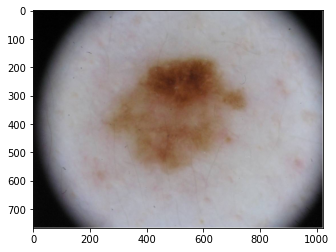

In [84]:
plt.imshow(img)

In [85]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

In [86]:
denoise = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)

In [87]:
denoise_ubyte = img_as_ubyte(denoise)

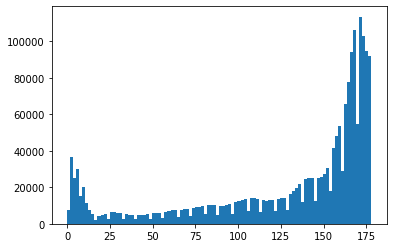

In [88]:
plt.hist(denoise_ubyte.flat, bins=100, range=(0,178))
plt.show()

In [89]:
segm1 = (denoise_ubyte <=80)
segm2 = (denoise_ubyte > 80) & (denoise_ubyte <= 130)
segm3 = (denoise_ubyte > 130)

In [90]:
all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

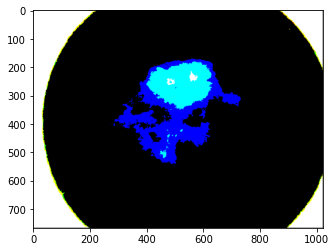

In [98]:
all_segments[segm1] = (1)
all_segments[segm2] = (0)
all_segments[segm3] = (0)
plt.imshow(all_segments)